<a href="https://colab.research.google.com/github/SMenon-14/Zoo-App/blob/main/model/ZooApp_Training_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install required packages (including model maker)
!pip install -q tflite-model-maker

     |████████████████████████████████| 591 kB 8.5 MB/s 
     |████████████████████████████████| 64 kB 4.0 MB/s 
     |████████████████████████████████| 679 kB 28.6 MB/s 
     |████████████████████████████████| 211 kB 65.5 MB/s 
     |████████████████████████████████| 6.3 MB 48.5 MB/s 
     |████████████████████████████████| 87 kB 8.3 MB/s 
     |████████████████████████████████| 1.2 MB 49.5 MB/s 
     |████████████████████████████████| 840 kB 50.1 MB/s 
     |████████████████████████████████| 1.1 MB 36.5 MB/s 
     |████████████████████████████████| 103 kB 20.4 MB/s 
     |████████████████████████████████| 636 kB 53.6 MB/s 
     |████████████████████████████████| 120 kB 63.8 MB/s 
     |████████████████████████████████| 352 kB 64.2 MB/s 
     |████████████████████████████████| 99 kB 11.3 MB/s 
     |████████████████████████████████| 37.1 MB 47 kB/s 
     |████████████████████████████████| 200 kB 70.8 MB/s 


In [ ]:
#import packages
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [ ]:
#mount drive (connect to your drive)
from google.colab import drive
drive.mount ('/content/gdrive',force_remount=True)
print ('hello')

Mounted at /content/gdrive
hello


In [ ]:
#set image path (directory containing images)
image_path = '/content/gdrive/My Drive/ZooApp/Images/Training'

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 4085, num_label: 68, labels: African Bullfrog, African Crested Porcupine, African Lungfish, African Painted Dog, African Red-Billed Hornbill, African Rock Python, African Slender-Snouted Crocodile, African Spurred Tortoise, Allen's Swamp Monkey, American Beaver, American Black Bear, Amur Tiger, Asian Elephant, Bald Eagle, Black Rhinoceros, Black and White-Ruffed Lemur, Bontebok, Bufflehead, Bull Trout, California Condor, Cattle Egret, Cheetah, Chimpanzee, Chinook Salmon, Cinnamon Teal, Coho Salmon, Colobus Monkey, Cougar, De Brazza's Monkey, Dwarf Mongoose, Giraffe, Grey Gull, Hadada Ibis, Harbor Seal, Hooded Merganser, Humboldt Penguin, Inca Tern, Lesser Flamingo, Lion, Naked Mole Rat, Nankin Chicken, Northern Pintail, Northern Shoveler, Orangutan, Pacific Lamprey, Polar Bear, Pygmy Goat, Pygora Goat, Rainbow Trout, Red Panda, Red-Crested Pochard, Redhead, Ring-Tailed Lemur, Ringtail, River Otter, Rocky Mountain Goat, Rodrigues Flying Fox, Sacred 

In [ ]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 68)                87108     
Total params: 3,500,132
Trainable params: 87,108
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


KeyboardInterrupt: ignored

In [ ]:
loss, accuracy = model.evaluate(test_data)

13/13 [==============================] - 80s 6s/step - loss: 1.5955 - accuracy: 0.7873


In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

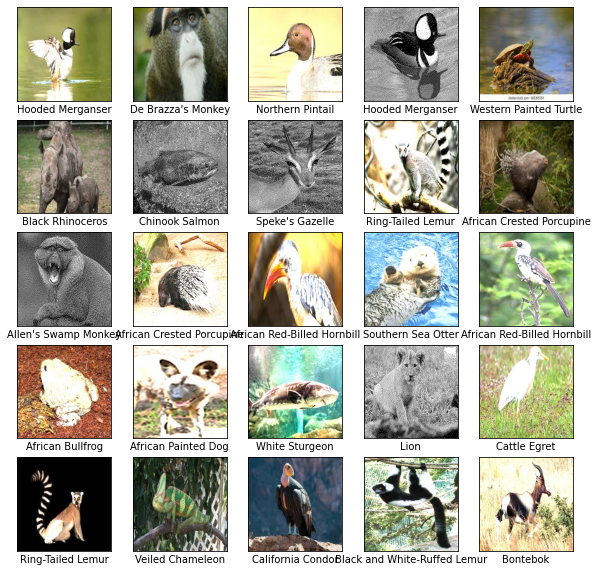

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 68)                87108     
Total params: 3,500,132
Trainable params: 87,108
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


102/102 [==============================] - 624s 6s/step - loss: 3.7167 - accuracy: 0.2163 - val_loss: 2.8303 - val_accuracy: 0.5495
Epoch 2/5
102/102 [==============================] - 17s 169ms/step - loss: 2.3995 - accuracy: 0.6464 - val_loss: 2.0655 - val_accuracy: 0.6901
Epoch 3/5
102/102 [==============================] - 18s 176ms/step - loss: 1.8602 - accuracy: 0.7521 - val_loss: 1.7938 - val_accuracy: 0.7422
Epoch 4/5
102/102 [==============================] - 19s 189ms/step - loss: 1.6379 - accuracy: 0.8024 - val_loss: 1.6734 - val_accuracy: 0.7656
Epoch 5/5
102/102 [==============================] - 18s 176ms/step - loss: 1.5157 - accuracy: 0.8287 - val_loss: 1.6068 - val_accuracy: 0.7865


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 68)                87108     
Total params: 3,500,132
Trainable params: 87,108
Non-trainable params: 3,413,024
_________________________________________________________________


In [ ]:
loss, accuracy = model.evaluate(test_data)

13/13 [==============================] - 77s 5s/step - loss: 1.6376 - accuracy: 0.7751


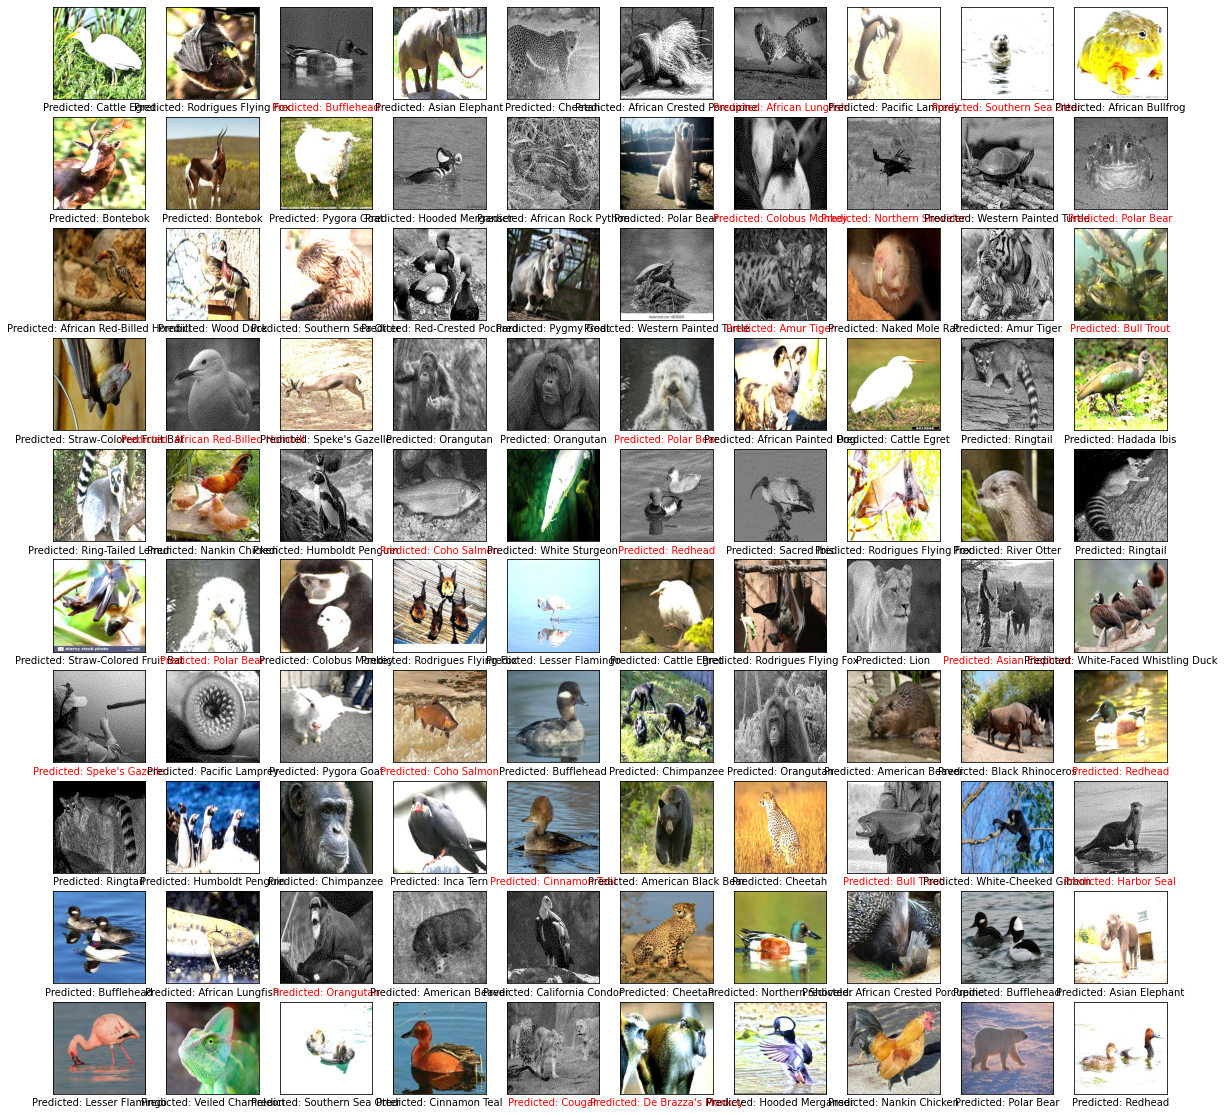

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='/content/gdrive/My Drive/ZooApp')

INFO:tensorflow:Assets written to: /tmp/tmpxx3n35i4/assets


INFO:tensorflow:Assets written to: /tmp/tmpxx3n35i4/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpnhmyjxw3/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpnhmyjxw3/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/gdrive/My Drive/ZooApp/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/gdrive/My Drive/ZooApp/model.tflite


In [ ]:
model.export(export_dir='/content/gdrive/My Drive/ZooApp', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in /content/gdrive/My Drive/ZooApp/labels.txt


INFO:tensorflow:Saving labels in /content/gdrive/My Drive/ZooApp/labels.txt
